# Radial Velocity and RV Uncertainty Data plots for '55 Cnc'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Use numpy to unpack and return data from text file to program
**USE THIS FUNCTION TO ACCESS DATA**

In [2]:
def read_data_from_txt(text_file):
    data_unpack = np.loadtxt(text_file,unpack=True,usecols=(0,1,2))
    return data_unpack

Create labeled arrays for each set of data and print

In [3]:
global_data_unpack = np.loadtxt('exoplanetinfo_copy.txt',unpack=True,usecols=(0,1,2))
#print(global_data_unpack)

In [4]:
def print_each_array(text_file):
    data_arrays = read_data_from_txt(text_file)
    hjd = data_arrays[0]
    rv = data_arrays[1]
    rv_uncertainty = data_arrays[2]
    
    print(f"HJD Array (Days): {hjd}")
    print(f"Radial Velocity (m/s): {rv}")
    print(f"Radial Velocity Uncertainty (m/s): {rv_uncertainty}")

Create two plots of the data

In [5]:
def plot_data(text_file):
    # set variables
    data_arrays = read_data_from_txt(text_file)
    hjd = data_arrays[0]
    rv = data_arrays[1]
    rv_uncertainty = data_arrays[2]
    # initialize figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,5)) #sharey=True
    
    # create first subplot
    ax1.scatter(hjd, rv, color='blue', marker='+', label='Radial Velocity')
    ax1.set_ylabel('Radial Velocity (m/s)')
    ax1.set_xlabel('HJD (Days)')
    ax1.legend()
    ax1.set_title("'55 Cnc' Radial Velocity over HJD")
    
    # set first subplot y limit
    ax1.set_ylim(-150, 150)
    ax1.set_yticks(np.arange(-150, 151, 50))
    
    # create second subplot
    ax2.scatter(hjd, rv_uncertainty, color='red', marker='+', label='RV Uncertainty')
    ax2.set_ylabel('Radial Velocity Uncertainty (m/s)')
    ax2.set_xlabel('HJD (Days)')
    ax2.legend()
    ax2.set_title("'55 Cnc' Radial Velocity Uncertainty over HJD")
    
    # set second subplot y limit
    ax2.set_ylim(0, 5)
    ax2.set_yticks(np.arange(0, 6, 1))
    
    ax1.grid(True)
    ax2.grid(True)
    
    plt.tight_layout()
    
    # uncomment below to save as pdf
    #plt.savefig('55_cnc_data_plots.pdf', format='pdf')
    
    plt.show()

In [6]:
#print(read_data_from_txt('exoplanetinfo_copy.txt'))

In [7]:
print_each_array('exoplanetinfo_copy.txt')

HJD Array (Days): [2449676.0632  2449767.77441 2449768.83203 2449793.79785 2450056.98828
 2450087.88184 2450088.91894 2450089.00586 2450089.77637 2450089.98633
 2450090.74512 2450090.89258 2450091.84863 2450091.96973 2450120.87243
 2450121.88866 2450124.85765 2450125.77783 2450126.83752 2450127.85104
 2450128.86732 2450144.71034 2450144.85357 2450145.625   2450145.76465
 2450148.88742 2450150.74885 2450152.66281 2450168.74902 2450171.73959
 2450172.68686 2450173.72485 2450179.73422 2450180.68848 2450181.63379
 2450186.73954 2450187.68636 2450199.68319 2450200.70104 2450201.68663
 2450202.68868 2450203.68772 2450214.68668 2450215.67357 2450233.69028
 2450422.00586 2450437.92852 2450441.9541  2450502.78136 2450503.76303
 2450504.77366 2450536.77162 2450537.7645  2450550.72661 2450563.71983
 2450614.69333 2450793.90234 2450794.96191 2450831.93164 2451153.0332
 2451155.01856 2451206.87793 2451212.92549 2451213.88293 2451242.74023
 2451298.72157 2451305.70801 2451469.05273 2451532.99609 245

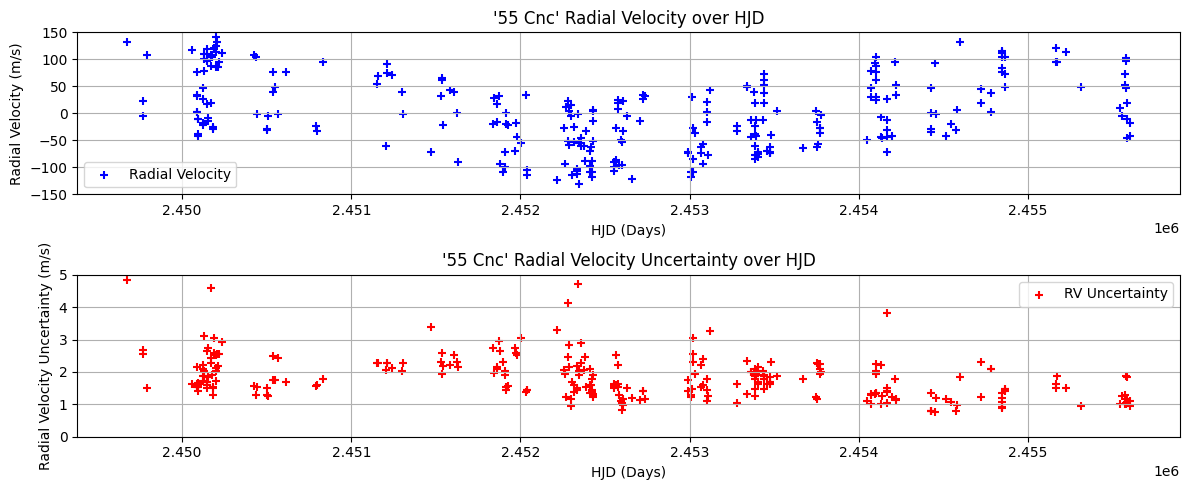

In [8]:
plot_data('exoplanetinfo_copy.txt')

In [9]:
from scipy import optimize
from scipy import interpolate
from astropy.table import Table

In [10]:
#global_data_unpack[0] = x or HJD (Days)
#global_data_unpack[1] = y1 or rv
#global_data_unpack[2] = y2 or rv_uncertainty

#NEED TO MODIFY

def f_curve(x, a, b, c, d):
    """
    Describes the basic sine function.
    """
    return a * np.sin(2.0 * np.pi*(x - b) / c) + d

v_shift = np.mean(global_data_unpack[1]) #this is the most accurate vertical shift possible
                     #defined early to be accessed in later instantiations

amplitude = np.mean(np.abs(global_data_unpack[1])) - v_shift #defines the amplitude to be the mean of y where all values are set to be >= 0
                               #the advantage of this amplitude is that it is definitively the least far away amplitude if dealing with a lot of outliers

h_shift = 24500
  #to find this value, we should try and find the location where x is closest to the vertical shift

period = 10000

initial_guess = [amplitude, h_shift, period, v_shift]
print(amplitude)
print(np.std(global_data_unpack[1]))

params, params_cov = optimize.curve_fit(f_curve, global_data_unpack[0], global_data_unpack[1], sigma = global_data_unpack[2], absolute_sigma = True,
                                       p0 = initial_guess)

55.43328488318583
67.06616160864814


Fitted parameters: [   80.49016208 24599.99999997 10001.98852854    44.40538703]


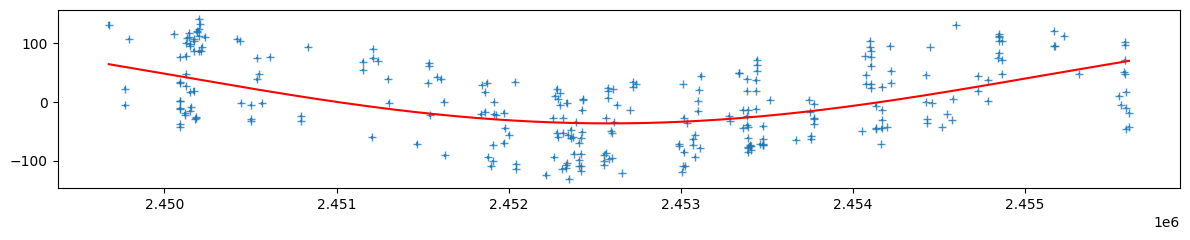

In [14]:
#THIS CODE DOES NOT WORK PLEASE FIX

#in particularly difficult cases, we can also provide the boundaries to explore parameter ranges
#The bounds are set to be adaptive to our guesses so we don't need to rewrite them every time

rfe = 100 #defines the room for error
        #Should be a positive value

low_bound = [np.ceil(initial_guess[0]) - rfe, np.ceil(initial_guess[1]) - rfe, np.ceil(initial_guess[2]) - rfe, np.ceil(initial_guess[3]) - rfe]
    #Sets every value in the initial guess to be mapped to the ceiling of the value at the given index -1
high_bound = [np.floor(initial_guess[0]) + rfe, np.floor(initial_guess[1]) + rfe, np.floor(initial_guess[2]) + rfe, np.floor(initial_guess[3]) + rfe]
    #Sets every value in the initial guess to be mapped to the floor of the value at the given index +1
params, params_cov = optimize.curve_fit(f_curve, global_data_unpack[0], global_data_unpack[1], sigma = global_data_unpack[2], absolute_sigma = True,
                                       p0 = initial_guess, bounds = (low_bound, high_bound))

print(f"Fitted parameters: {params}")

#let's see how the best fit model looks by plotting it, along with the data
x_fit = np.linspace(np.min(global_data_unpack[0]), np.max(global_data_unpack[0]), 500)
y_fit = f_curve(x_fit, *params) #providing '*params' is called 'unpacking' and is identical to write
                                # 'params[0], params[1], params[2]...'

fig = plt.subplots(1, 1, figsize=(12,2.5))

plt.errorbar(global_data_unpack[0], global_data_unpack[1], global_data_unpack[2], fmt='+', label = 'Data', alpha=0.8, zorder = 1) #data
plt.plot(x_fit, y_fit, 'r-', label='Fit', zorder = 2)

plt.tight_layout()
plt.show()